In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [2]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Income","Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


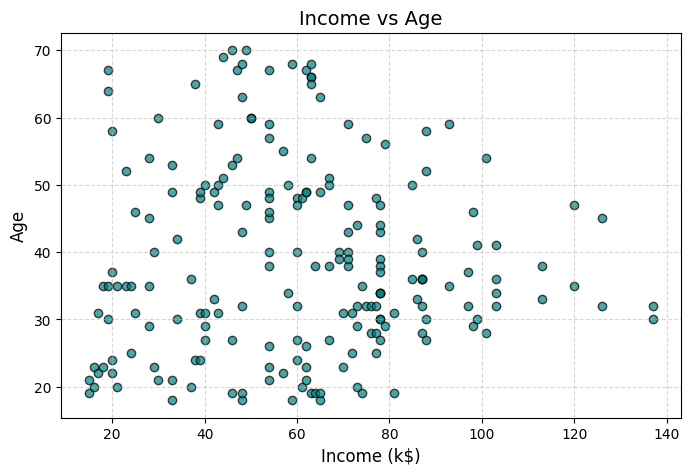

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot Income vs Age
plt.figure(figsize=(8,5))
plt.scatter(df['Income'], df['Age'], color='teal', alpha=0.7, edgecolor='k')
plt.title('Income vs Age', fontsize=14)
plt.xlabel('Income (k$)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()


In [12]:
# Membuat dataframe baru yang hanya berisi Age dan Income
df = df[['Age', 'Income']]
df.head()

,Age,Income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


# Data Scaling (Choose One)

    Age  Income
0  0.19   0.015
1  0.21   0.015
2  0.20   0.016
3  0.23   0.016
4  0.31   0.017


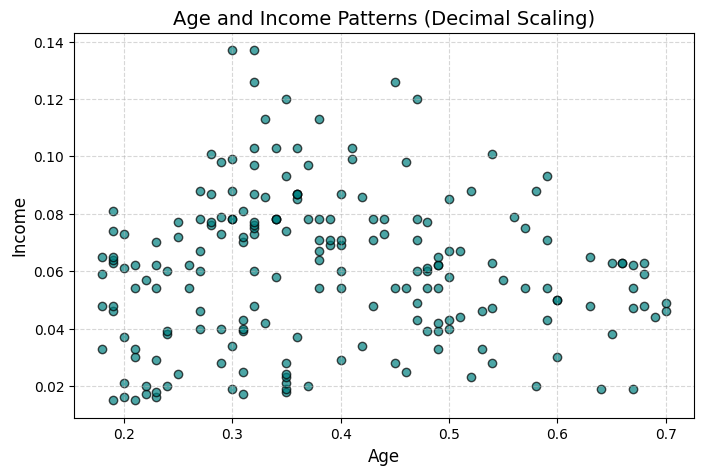

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)

# Rename columns (jika belum dilakukan di dataset)
df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True)

# Pilih kolom Age dan Income
df = df[['Age', 'Income']]

# Fungsi Decimal Scaling
def decimal_scaling(df):
    normalized_df = df.copy()
    for column in df.columns:
        j = 0
        max_value = abs(df[column].max())
        while max_value > 1:
            max_value /= 10
            j += 1
        normalized_df[column] = df[column] / (10 ** j)
    return normalized_df

# Terapkan Decimal Scaling
df_decimal_scaled = decimal_scaling(df)

# Tampilkan hasil scaling
print(df_decimal_scaled.head())

# Visualisasi hasil scaling
plt.figure(figsize=(8,5))
plt.scatter(df_decimal_scaled["Age"], df_decimal_scaled["Income"], color='teal', alpha=0.7, edgecolor='k')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.title("Age and Income Patterns (Decimal Scaling)", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()


        Age    Income
0 -1.424569 -1.738999
1 -1.281035 -1.738999
2 -1.352802 -1.700830
3 -1.137502 -1.700830
4 -0.563369 -1.662660


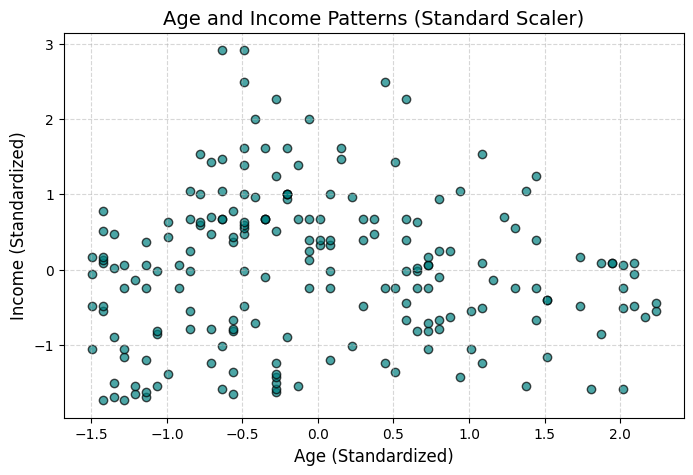

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)

# Rename columns (jika belum dilakukan di dataset)
df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True)

# Pilih kolom Age dan Income
df = df[['Age', 'Income']]

# Standard Scaler
sc = StandardScaler()
df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Age", "Income"])

# Tampilkan hasil scaling
print(df_sc_scaled.head())

# Visualisasi hasil scaling
plt.figure(figsize=(8,5))
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Income"], color='teal', alpha=0.7, edgecolor='k')
plt.xlabel("Age (Standardized)", fontsize=12)
plt.ylabel("Income (Standardized)", fontsize=12)
plt.title("Age and Income Patterns (Standard Scaler)", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

        Age    Income
0  0.019231  0.000000
1  0.057692  0.000000
2  0.038462  0.008197
3  0.096154  0.008197
4  0.250000  0.016393


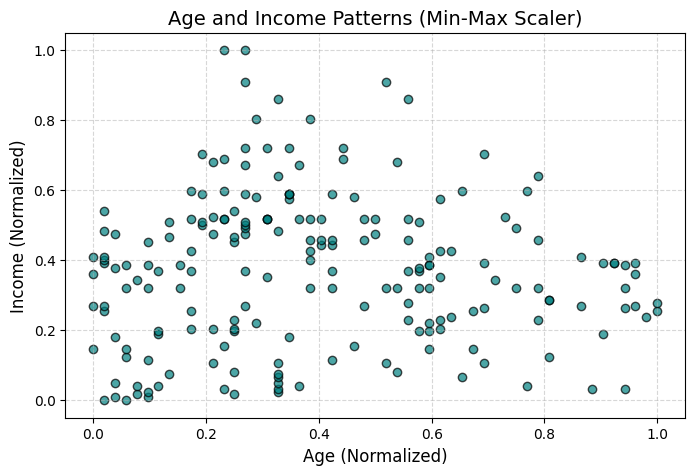

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Pilih kolom Age dan Income
df = df[['Age', 'Income']]

# Min-Max Scaler
scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df), columns=["Age", "Income"])

# Tampilkan hasil scaling
print(df_minmax_scaled.head())

# Visualisasi hasil scaling
plt.figure(figsize=(8,5))
plt.scatter(df_minmax_scaled["Age"], df_minmax_scaled["Income"], color='teal', alpha=0.7, edgecolor='k')
plt.xlabel("Age (Normalized)", fontsize=12)
plt.ylabel("Income (Normalized)", fontsize=12)
plt.title("Age and Income Patterns (Min-Max Scaler)", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()


##K-Means Clustering

In [16]:
from sklearn.cluster import KMeans

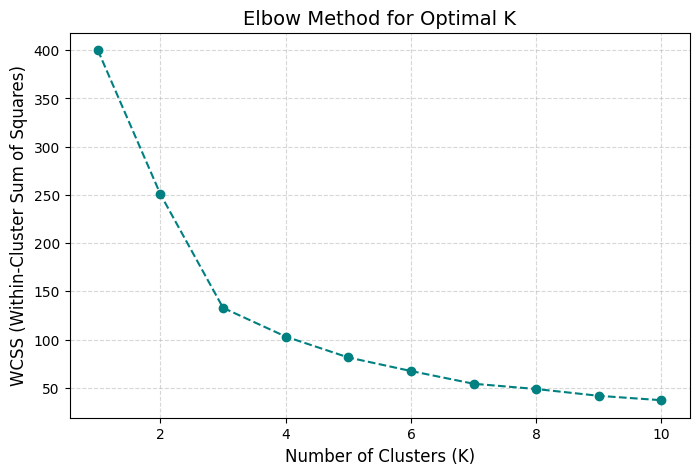

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Hitung WCSS untuk nilai K 1–10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='teal')
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()


In [20]:
import pandas as pd

# Membuat DataFrame untuk menampilkan nilai WCSS dari setiap jumlah cluster
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Menampilkan tabel WCSS
print(wcss_table)


   Number of Clusters        WCSS
0                   1  400.000000
1                   2  250.588116
2                   3  132.855304
3                   4  103.051518
4                   5   81.408191
5                   6   67.358905
6                   7   54.161256
7                   8   48.692261
8                   9   41.640921
9                  10   37.080115


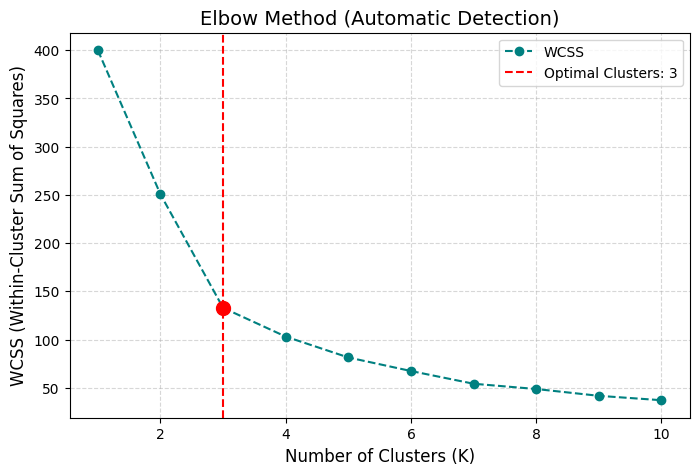

The optimal number of clusters is: 3


In [21]:
# Standard Scaler
sc = StandardScaler()
df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Age", "Income"])

# Hitung WCSS untuk K = 1–10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Tentukan elbow point secara otomatis menggunakan KneeLocator
clusters = range(1, 11)
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Visualisasi Elbow Method dengan titik optimal
plt.figure(figsize=(8,5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS", color='teal')
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)
plt.title('Elbow Method (Automatic Detection)', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

# Cetak jumlah cluster optimal
print(f"The optimal number of clusters is: {optimal_clusters}")

In [22]:
# Fit K-Means dengan jumlah cluster optimal = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Tambahkan label cluster ke DataFrame asli
df['KMeans_Cluster'] = clusters

# Tampilkan DataFrame dengan kolom cluster
df.head()

,Age,Income,KMeans_Cluster
0,19,15,2
1,21,15,2
2,20,16,2
3,23,16,2
4,31,17,2


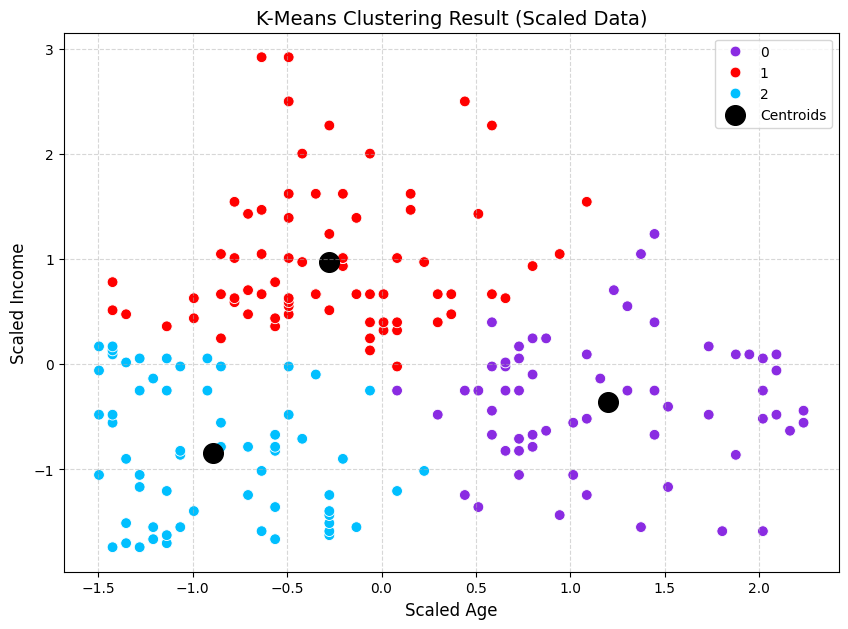

In [23]:
# Visualisasi hasil clustering pada data yang sudah diskalakan
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="Age",
    y="Income",
    hue=clusters,
    palette=["blueviolet", "red", "deepskyblue"],
    data=df_sc_scaled,
    s=60
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="black",
    label="Centroids"
)
plt.xlabel("Scaled Age", fontsize=12)
plt.ylabel("Scaled Income", fontsize=12)
plt.title("K-Means Clustering Result (Scaled Data)", fontsize=14)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

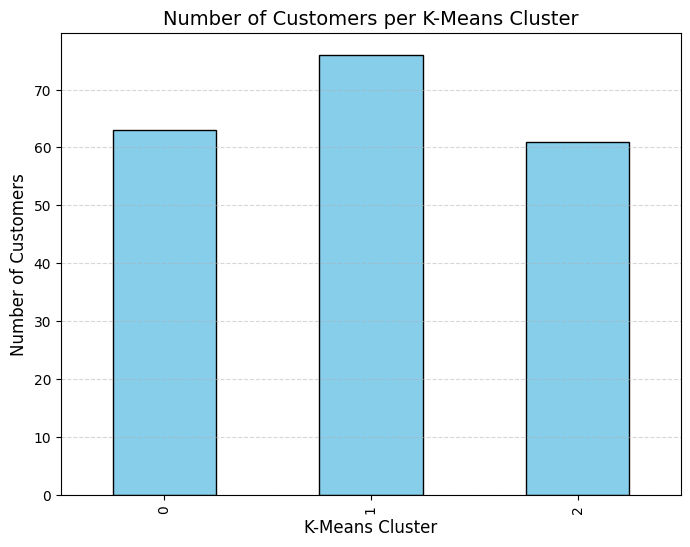

In [24]:
# Hitung jumlah anggota pada setiap cluster
cluster_counts = df['KMeans_Cluster'].value_counts().sort_index()

# Visualisasi jumlah anggota tiap cluster
plt.figure(figsize=(8,6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Customers per K-Means Cluster', fontsize=14)
plt.xlabel('K-Means Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [25]:
# Kelompokkan data berdasarkan cluster dan hitung statistik ringkasan
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max']
})

# Ganti nama indeks agar lebih jelas
cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

# Tampilkan ringkasan cluster
cluster_summary


Age             Income         
                     mean min max       mean min  max
KMeans_Cluster                                       
0               55.555556  40  70  51.269841  19   93
1               34.960526  19  54  85.934211  60  137
2               26.442623  18  42  38.540984  15   65

##Cluster 0 - Young / Low-Income Consumers
#
Profile:
#
- Usia relatif muda (rata-rata 20–30 tahun).
#
- Pendapatan rendah hingga menengah (~$35K–$55K).
#
- Kemungkinan masih awal karier, lebih sensitif terhadap harga, dan memiliki daya beli terbatas.
#
Implications:
#
- Fokus pada produk dengan harga terjangkau dan promo menarik.
#
- Gunakan kanal digital seperti media sosial untuk menarik perhatian mereka.
#
- Dorong program loyalitas atau cashback untuk meningkatkan retensi.
#
- Tampilkan pesan pemasaran yang menonjolkan aspirasi dan gaya hidup modern.

##Cluster 1 - Mature / High-Income Customers
#
Profile:
#
- Usia lebih matang (sekitar 35–50 tahun).
- Memiliki pendapatan tertinggi di antara semua cluster (~$100K ke atas).
- Stabil secara finansial, lebih memilih kualitas dan kenyamanan daripada harga.
#
Implications:
#
- Targetkan dengan produk premium, eksklusif, atau layanan khusus.
- Gunakan pesan pemasaran yang menekankan status, kepercayaan, dan kemewahan.
- Program membership VIP atau pengalaman personal akan meningkatkan loyalitas.
- Cocok untuk strategi cross-selling atau up-selling.

## Cluster 2 - Middle-Aged / Mid-Income Segment
#
Profile:
#
- Usia menengah (sekitar 30–40 tahun).
- Pendapatan menengah (~$60K–$80K).
- Cenderung stabil dalam pekerjaan, kemungkinan sudah berkeluarga, dan memperhatikan keseimbangan harga–nilai.
#
Implications:
#
- Tawarkan produk dengan nilai terbaik (value-for-money).
- Kampanye pemasaran bisa berfokus pada keamanan, keandalan, dan dukungan purna jual.
- Gunakan promosi keluarga atau program cicilan ringan.
- Segment ini penting untuk menjaga volume penjualan secara berkelanjutan
